In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import shutil
from pathlib import Path

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading packages

In [3]:
import sys
from pathlib import Path

here_path = Path().resolve()
repo_path = here_path.parents[1]
sys.path.append(str(repo_path))

In [4]:
from py.utils import verifyDir, verifyFile, verifyType

In [5]:
from py.config import Config

cfg = Config()

np.random.seed(cfg.RANDOM_STATE)
cfg.DATA_PATH, cfg.MODEL_PATH

('/media/felipe/DATA19/datasets/', '/media/felipe/DATA19/models/')

In [6]:
RAW_PATH=f"{cfg.DATA_PATH}pp2/raw_data/"
QSCORE_PATH=f"{cfg.DATA_PATH}pp2/Qscores/"
IMAGES_PATH = f"{cfg.DATA_PATH}pp2/images/"
COMPARISONS_PATH=f"{cfg.DATA_PATH}pp2/comparisons/"

In [7]:
verifyDir(QSCORE_PATH)
verifyDir(COMPARISONS_PATH)

### Loading data

In [8]:
from py.datasets import PlacePulse

pp = PlacePulse()

In [9]:
places_df = pd.read_csv(f"{RAW_PATH}places.tsv", sep="\t").rename(columns={"_id":"place_id"})
# deleting data_resolution, locationdistribution, owner, polygon
places_df = places_df[["place_id", "place_name"]].rename(columns={"place_name": "City"})
# places_df.to_csv(f"{PROCESSED_PATH}places.csv", index=False)
places_df

,place_id,City
0,50e5e9c1d7c3df413b000000,Amsterdam
1,50e5ec46d7c3df413b000062,Barcelona
2,50e5ef31d7c3df413b000178,Belo Horizonte
3,50e5f168d7c3df413b000279,Boston
4,50e5f30fd7c3df413b000303,Chicago
5,50e5f69ed7c3df413b000377,Denver
6,50e5f7c1d7c3df413b000495,Hong Kong
7,50e5f937d7c3df413b0005b3,Kiev
8,50e5fad8d7c3df413b00063c,Kyoto
9,50e5fc32d7c3df413b000788,Lisbon


### Studies/categories evaluated

In [10]:
studies_df = pd.read_csv(f"{RAW_PATH}studies.tsv", sep="\t").rename(columns={"_id":"study_id"})
# changing category names
studies_df["category"]=studies_df["study_question"].apply(lambda x: pp.map_category(x))
# deleting owner, study_name, study_public, study_question
studies_df = studies_df[["study_id", "category", "num_votes"]]
studies_df.sort_values(by="num_votes", inplace=True, ascending=False)
# studies_df.to_csv(f"{PROCESSED_PATH}studies.csv", index=False)
studies_df

,study_id,category,num_votes
0,50a68a51fdc9f05596000002,safety,511037
1,50f62c41a84ea7c5fdd2e454,lively,367476
5,5217c351ad93a7d3e7b07a64,beautiful,220656
3,50f62cb7a84ea7c5fdd2e458,wealthy,174784
4,50f62ccfa84ea7c5fdd2e459,depressing,149361
2,50f62c68a84ea7c5fdd2e456,boring,144068


### Locations

In [11]:
locations_df = pd.read_csv(f"{RAW_PATH}locations.tsv", sep="\t").rename(columns={"_id":"location_id","loc.0":"lat", "loc.1":"long"})
# merging with places
locations_df = pd.merge(locations_df, places_df, how="left", on="place_id")
# deleting heading, owner, pitch, type, votes, places_id
locations_df[['continent', 'country', 'city']] = locations_df.apply( lambda row: pp.localize_point(row['lat'], row['long']), axis=1, result_type='expand')
locations_df.sort_values(by=["lat", "long"], inplace=True)
locations_df.drop(columns=["City", "heading", "owner", "pitch", "type", "votes", "place_id"], inplace=True)
# locations_df.to_csv(f"{PROCESSED_PATH}locations.csv", index=False)
locations_df

,location_id,lat,long,continent,country,city
99945,5141467cfdc9f04926006812,-37.954338,145.049438,Oceania,Australia,Melbourne
98470,5141418afdc9f049260061d0,-37.954170,145.064406,Oceania,Australia,Melbourne
98967,51414359fdc9f049260063c1,-37.953705,145.049362,Oceania,Australia,Melbourne
99090,514143d3fdc9f0492600643c,-37.952810,145.029987,Oceania,Australia,Melbourne
99238,51414466fdc9f049260064d0,-37.952604,145.013120,Oceania,Australia,Melbourne
...,...,...,...,...,...,...
92500,5141341ffdc9f04926004536,60.277422,24.973295,Europe,Finland,Helsinki
93408,5141351afdc9f049260048c2,60.277591,25.015701,Europe,Finland,Helsinki
93272,514134f1fdc9f0492600483a,60.277987,25.025202,Europe,Finland,Helsinki
91950,51413380fdc9f04926004310,60.278803,24.995722,Europe,Finland,Helsinki


#### Verifying by lat and long

In [12]:
locations_df.drop_duplicates(subset=["lat", "long"])

,location_id,lat,long,continent,country,city
99945,5141467cfdc9f04926006812,-37.954338,145.049438,Oceania,Australia,Melbourne
98470,5141418afdc9f049260061d0,-37.954170,145.064406,Oceania,Australia,Melbourne
98967,51414359fdc9f049260063c1,-37.953705,145.049362,Oceania,Australia,Melbourne
99090,514143d3fdc9f0492600643c,-37.952810,145.029987,Oceania,Australia,Melbourne
99238,51414466fdc9f049260064d0,-37.952604,145.013120,Oceania,Australia,Melbourne
...,...,...,...,...,...,...
92500,5141341ffdc9f04926004536,60.277422,24.973295,Europe,Finland,Helsinki
93408,5141351afdc9f049260048c2,60.277591,25.015701,Europe,Finland,Helsinki
93272,514134f1fdc9f0492600483a,60.277987,25.025202,Europe,Finland,Helsinki
91950,51413380fdc9f04926004310,60.278803,24.995722,Europe,Finland,Helsinki


#### Verifying Images and locations

In [13]:
base_path = Path(IMAGES_PATH)
all_image_paths = np.sort([str(p.relative_to(base_path)) for p in base_path.glob('*/*.JPG')])
image_path_dict = {path.split("/")[-1].replace(".JPG",""): path for path in all_image_paths}

In [14]:
locations_df["image_path"] = locations_df["location_id"].map(image_path_dict)
locations_df

,location_id,lat,long,continent,country,city,image_path
99945,5141467cfdc9f04926006812,-37.954338,145.049438,Oceania,Australia,Melbourne,Melbourne/5141467cfdc9f04926006812.JPG
98470,5141418afdc9f049260061d0,-37.954170,145.064406,Oceania,Australia,Melbourne,Melbourne/5141418afdc9f049260061d0.JPG
98967,51414359fdc9f049260063c1,-37.953705,145.049362,Oceania,Australia,Melbourne,Melbourne/51414359fdc9f049260063c1.JPG
99090,514143d3fdc9f0492600643c,-37.952810,145.029987,Oceania,Australia,Melbourne,Melbourne/514143d3fdc9f0492600643c.JPG
99238,51414466fdc9f049260064d0,-37.952604,145.013120,Oceania,Australia,Melbourne,Melbourne/51414466fdc9f049260064d0.JPG
...,...,...,...,...,...,...,...
92500,5141341ffdc9f04926004536,60.277422,24.973295,Europe,Finland,Helsinki,Helsinki/5141341ffdc9f04926004536.JPG
93408,5141351afdc9f049260048c2,60.277591,25.015701,Europe,Finland,Helsinki,Helsinki/5141351afdc9f049260048c2.JPG
93272,514134f1fdc9f0492600483a,60.277987,25.025202,Europe,Finland,Helsinki,Helsinki/514134f1fdc9f0492600483a.JPG
91950,51413380fdc9f04926004310,60.278803,24.995722,Europe,Finland,Helsinki,Helsinki/51413380fdc9f04926004310.JPG


#### Identify missing images

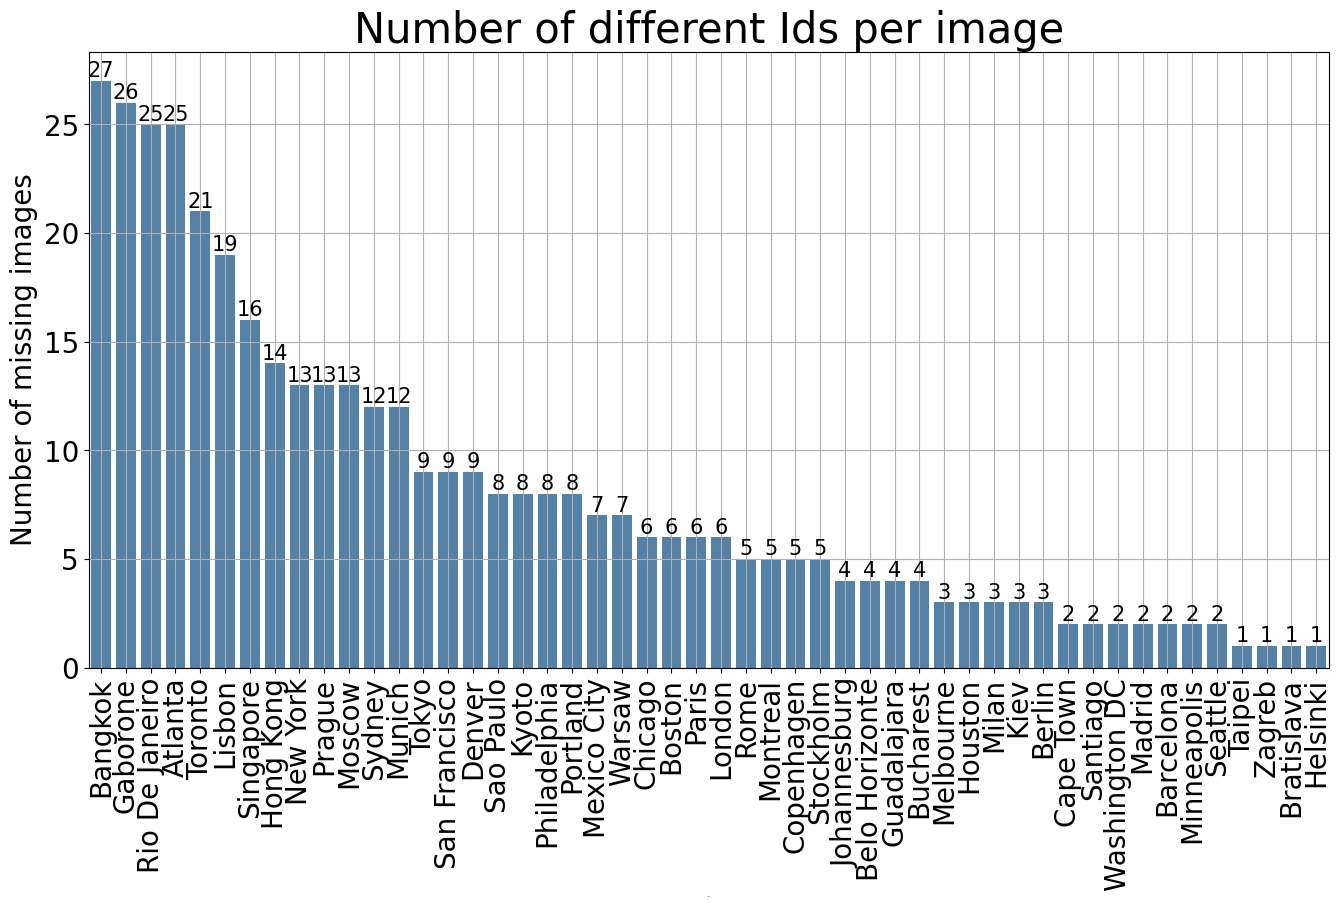

In [15]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

missing_df = locations_df[locations_df["image_path"].isna()].copy()
estado_df = missing_df["city"].value_counts().reset_index()

sns_fig = sns.barplot(
            data=estado_df,
            x=estado_df.columns[0],
            y=estado_df.columns[1],
            ax=ax,
            color="steelblue",
            order=estado_df.sort_values(estado_df.columns[1], ascending=False)[estado_df.columns[0]]
           )

sns_fig.set_title(f"Number of different Ids per image", fontsize=30)
sns_fig.set_ylabel(f"Number of missing images", fontsize=20)
sns_fig.set_xlabel('cities', fontsize=0)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/repeated_images_by_locations.png')
plt.show()

#### Deleting missing images 

In [16]:
locations_df = locations_df[~locations_df["image_path"].isna()].copy()
locations_df

,location_id,lat,long,continent,country,city,image_path
99945,5141467cfdc9f04926006812,-37.954338,145.049438,Oceania,Australia,Melbourne,Melbourne/5141467cfdc9f04926006812.JPG
98470,5141418afdc9f049260061d0,-37.954170,145.064406,Oceania,Australia,Melbourne,Melbourne/5141418afdc9f049260061d0.JPG
98967,51414359fdc9f049260063c1,-37.953705,145.049362,Oceania,Australia,Melbourne,Melbourne/51414359fdc9f049260063c1.JPG
99090,514143d3fdc9f0492600643c,-37.952810,145.029987,Oceania,Australia,Melbourne,Melbourne/514143d3fdc9f0492600643c.JPG
99238,51414466fdc9f049260064d0,-37.952604,145.013120,Oceania,Australia,Melbourne,Melbourne/51414466fdc9f049260064d0.JPG
...,...,...,...,...,...,...,...
92500,5141341ffdc9f04926004536,60.277422,24.973295,Europe,Finland,Helsinki,Helsinki/5141341ffdc9f04926004536.JPG
93408,5141351afdc9f049260048c2,60.277591,25.015701,Europe,Finland,Helsinki,Helsinki/5141351afdc9f049260048c2.JPG
93272,514134f1fdc9f0492600483a,60.277987,25.025202,Europe,Finland,Helsinki,Helsinki/514134f1fdc9f0492600483a.JPG
91950,51413380fdc9f04926004310,60.278803,24.995722,Europe,Finland,Helsinki,Helsinki/51413380fdc9f04926004310.JPG


#### Mapping same locations

In [17]:
repetitions_df = pd.pivot_table(locations_df,
                      index=["lat", "long", "city", "country", "continent"],
                      values=["location_id", "image_path"],
                      aggfunc={
                          "location_id": list,
                          "image_path":list
                      }).reset_index()
repetitions_df["num_locations"] = repetitions_df["location_id"].apply(lambda x: len(x))
repetitions_df["image_id"] = repetitions_df["location_id"].apply(lambda x: x[0])

repetitions_df.sort_values(by=["num_locations"], inplace=True, ascending=False)
repetitions_df=repetitions_df[["image_id"] + repetitions_df.columns[:-1].to_list()].copy()
# repetitions_df.to_csv(f"{PROCESSED_PATH}repeated_locations.csv", sep=";", index=False)
repetitions_df

,image_id,lat,long,city,country,continent,image_path,location_id,num_locations
54267,51422a8dfdc9f0492600895d,40.025697,-75.094741,Philadelphia,USA,North America,"[Philadelphia/51422a8dfdc9f0492600895d.JPG, Ph...","[51422a8dfdc9f0492600895d, 51422b60fdc9f049260...",4
13838,51413956fdc9f04926005444,-26.135842,28.122542,Johannesburg,South Africa,Africa,"[Johannesburg/51413956fdc9f04926005444.JPG, Jo...","[51413956fdc9f04926005444, 51413b3cfdc9f049260...",4
99443,513f2991fdc9f0358700d3bc,52.530760,13.511783,Berlin,Germany,Europe,"[Berlin/513f2991fdc9f0358700d3bc.JPG, Berlin/5...","[513f2991fdc9f0358700d3bc, 513f2b37fdc9f035870...",3
76428,51414ceafdc9f04926007456,45.486109,9.288965,Milan,Italy,Europe,"[Milan/51414ceafdc9f04926007456.JPG, Milan/514...","[51414ceafdc9f04926007456, 51414e2afdc9f049260...",3
10478,513d7a5ffdc9f035870067eb,-33.450779,-70.652330,Santiago,Chile,South America,"[Santiago/513d7a5ffdc9f035870067eb.JPG, Santia...","[513d7a5ffdc9f035870067eb, 513d7dc3fdc9f035870...",3
...,...,...,...,...,...,...,...,...,...
36477,50f439f8fdc9f065f0002e0e,32.122914,34.801782,Tel Aviv,Israel,Asia,[Tel Aviv/50f439f8fdc9f065f0002e0e.JPG],[50f439f8fdc9f065f0002e0e],1
36476,50f439fafdc9f065f0002e39,32.122615,34.840941,Tel Aviv,Israel,Asia,[Tel Aviv/50f439fafdc9f065f0002e39.JPG],[50f439fafdc9f065f0002e39],1
36475,50f43aaefdc9f065f0002f14,32.122462,34.812327,Tel Aviv,Israel,Asia,[Tel Aviv/50f43aaefdc9f065f0002f14.JPG],[50f43aaefdc9f065f0002f14],1
36474,50f43aa6fdc9f065f0002e87,32.122341,34.839318,Tel Aviv,Israel,Asia,[Tel Aviv/50f43aa6fdc9f065f0002e87.JPG],[50f43aa6fdc9f065f0002e87],1


#### Identify images with repeated locations

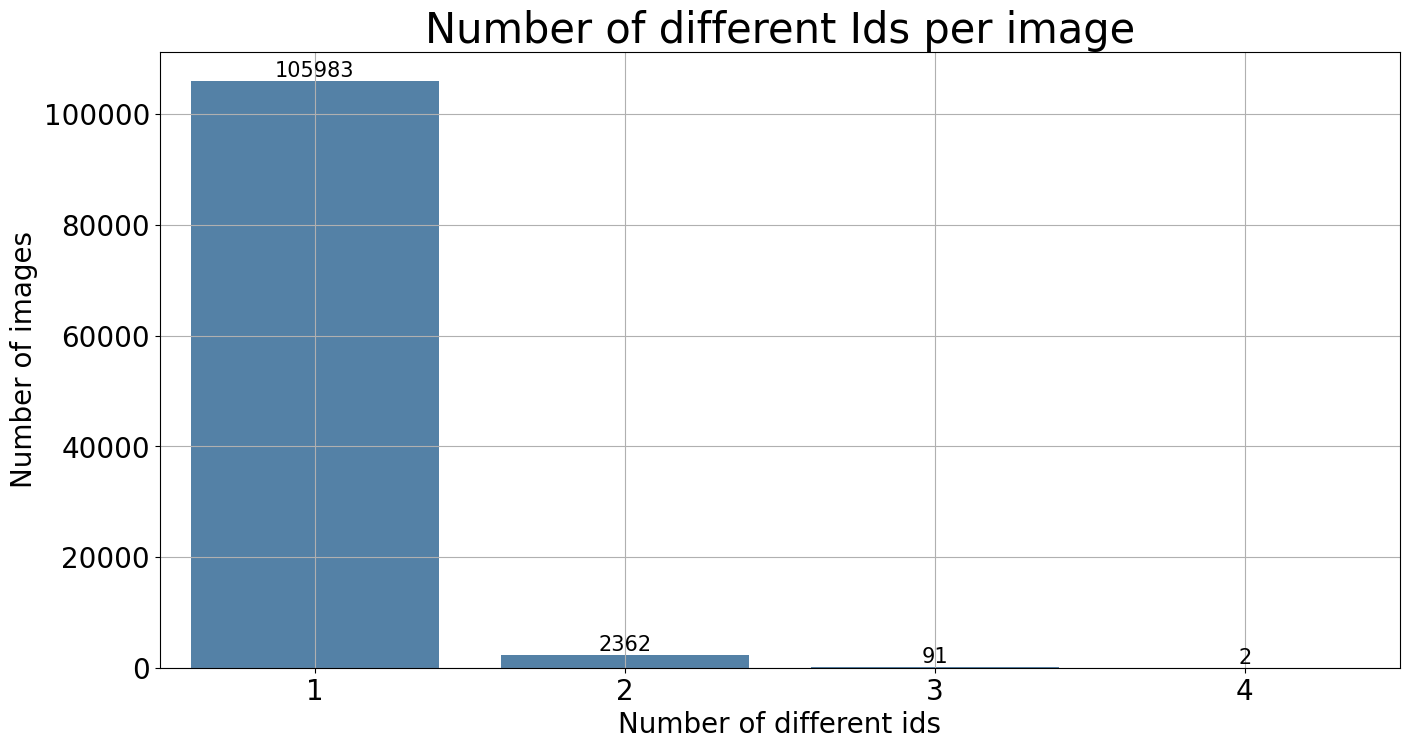

In [18]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

estado_df = repetitions_df["num_locations"].value_counts().reset_index()

sns_fig = sns.barplot(
            data=estado_df,
            x=estado_df.columns[0],
            y=estado_df.columns[1],
            ax=ax,
            color="steelblue",
            order=estado_df.sort_values(estado_df.columns[1], ascending=False)[estado_df.columns[0]]
           )

sns_fig.set_title(f"Number of different Ids per image", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=20)
sns_fig.set_xlabel('Number of different ids', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/repeated_images_by_locations.png')
plt.show()

#### Number of images with more than 1 different ID per city

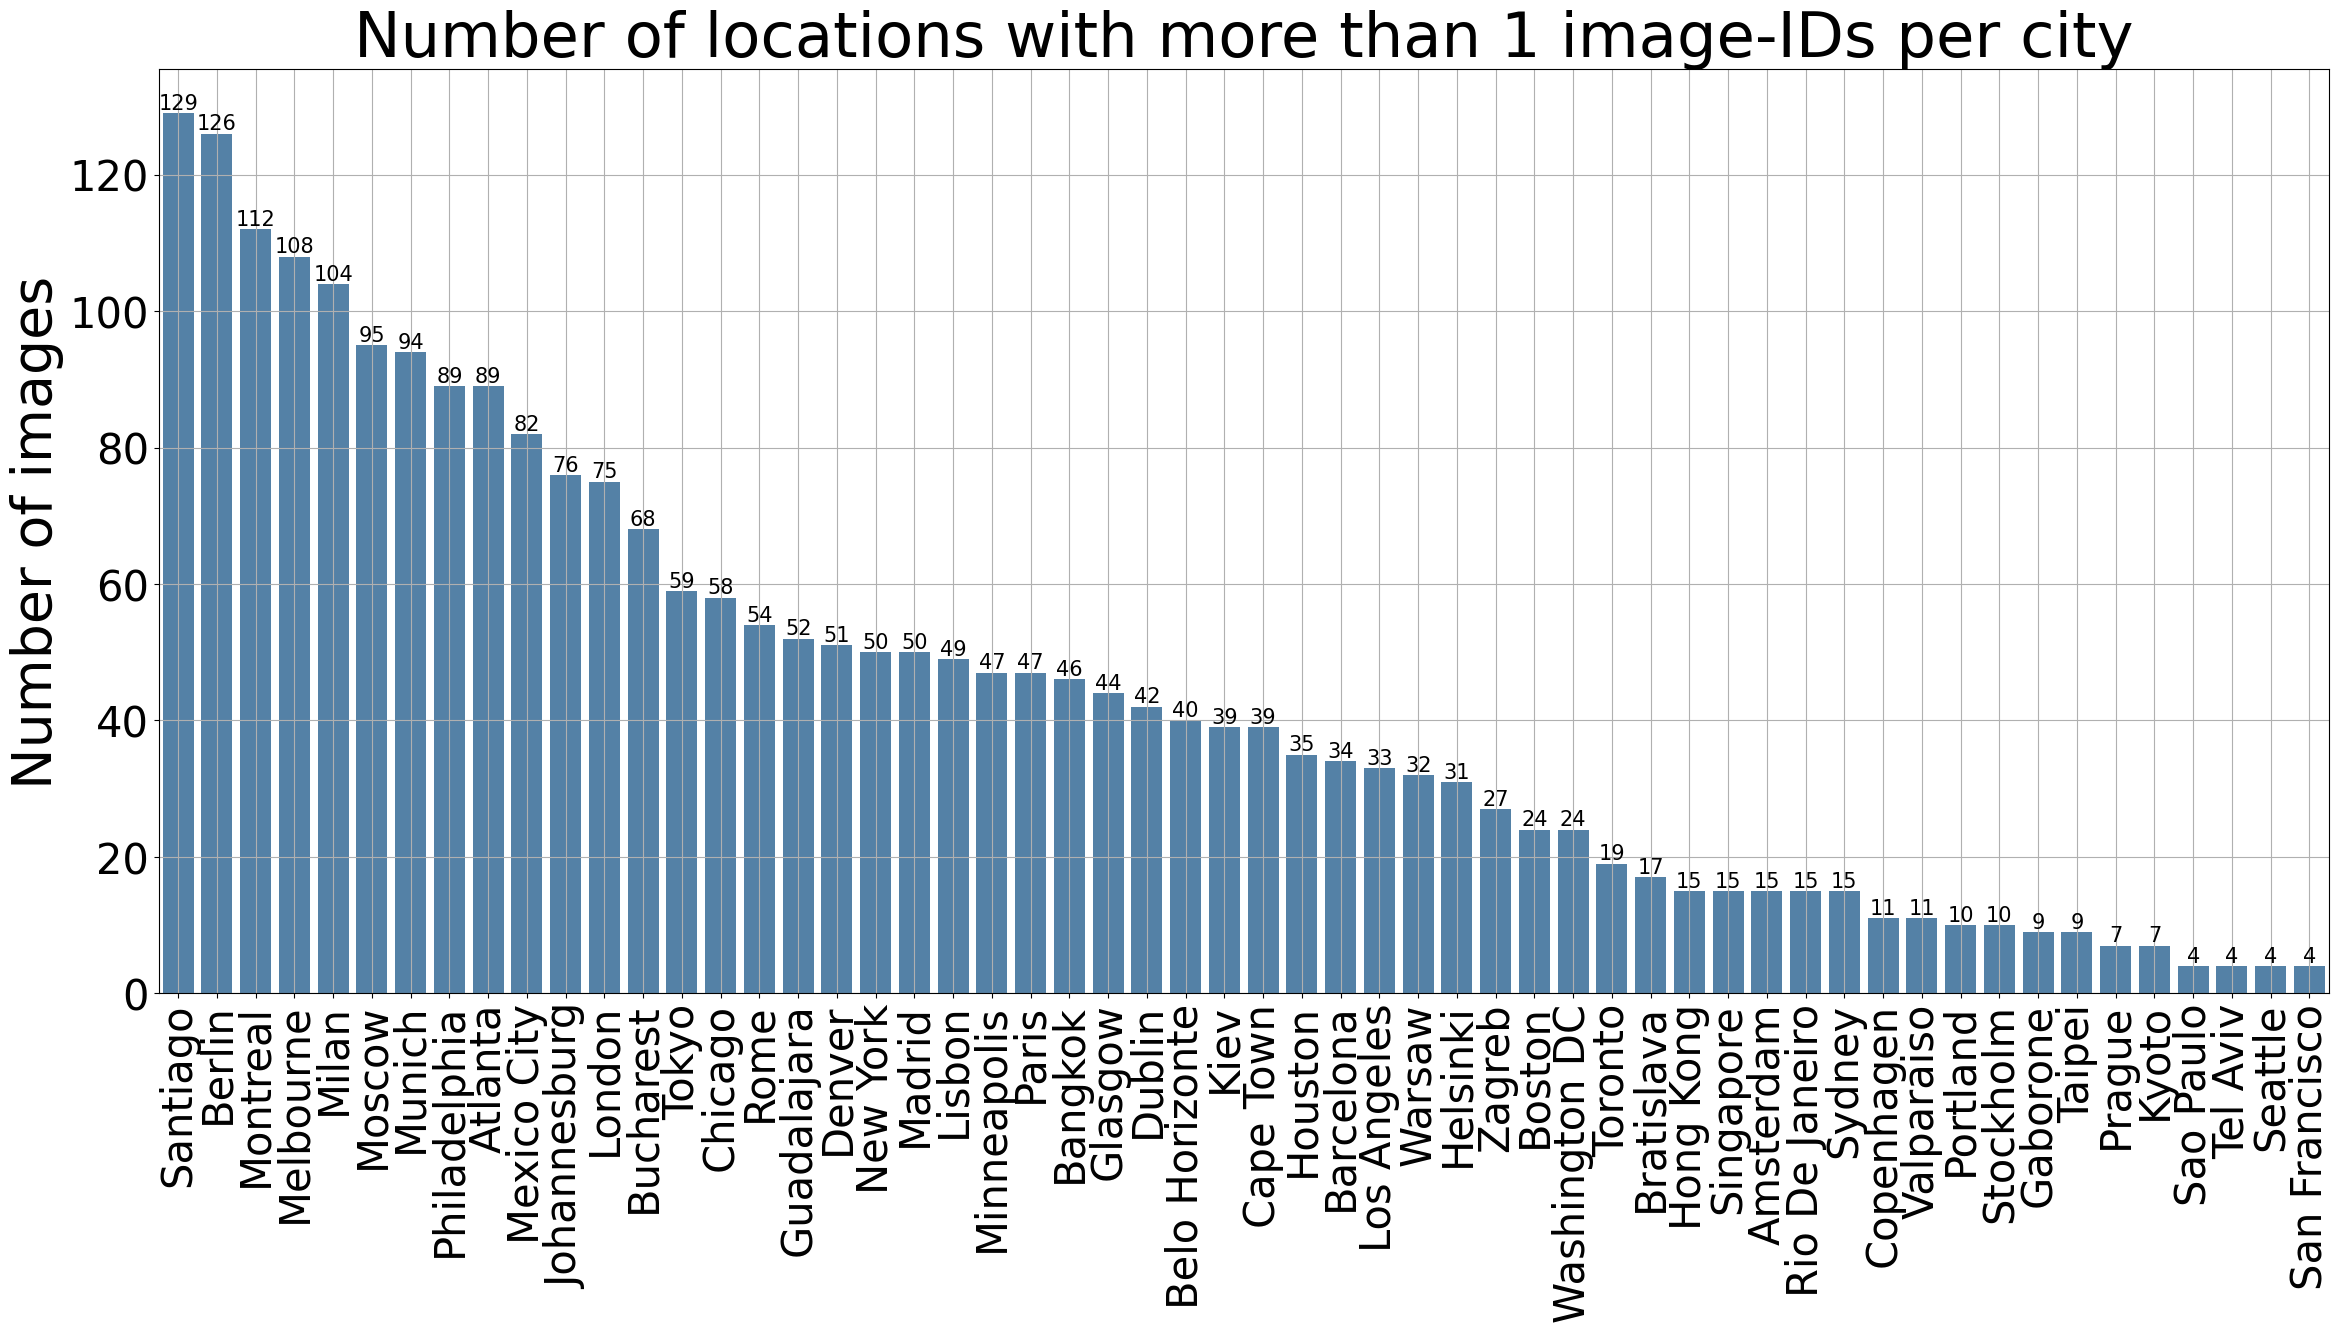

In [19]:
fig, ax = plt.subplots(figsize=(28,12), nrows=1, ncols=1, sharex=False, sharey=False)

estado_df = repetitions_df[repetitions_df["num_locations"] >1]["city"].value_counts().reset_index()

sns_fig = sns.barplot(
            data=estado_df,
            x=estado_df.columns[0],
            y=estado_df.columns[1],
            ax=ax,
            color="steelblue",
            #order=estado_df.sort_values(estado_df.columns[1], ascending=False)[estado_df.columns[0]]
           )

sns_fig.set_title(f"Number of locations with more than 1 image-IDs per city", fontsize=45)
sns_fig.set_ylabel(f"Number of images", fontsize=40)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=30)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=30)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_images_with_different_id_per_city.png')
plt.show()

### Votes

In [20]:
votes_df = pd.read_csv(f"{RAW_PATH}votes.tsv", sep="\t").rename(columns={"choice": "winner", "_id":"vote_id", "left": "left_id", "right": "right_id"})
# filtering bad rows
votes_df["winner"] = votes_df['winner'].apply(lambda x: pp.map_match_result(x))
votes_df = votes_df[votes_df["winner"].isin(["right", "left", "equal"])]
# # merging with studies
votes_df = pd.merge(votes_df, studies_df, how="left", on="study_id")
# # # deleting vote_id, study_id, timestamp, voter_uniqueid
votes_df = votes_df[["vote_id", "left_id", "right_id", "winner", "category", "voter_uniqueid", "timestamp"]].copy()
# # filtering bad rows
votes_df = votes_df[~votes_df["left_id"].isin(["AxRsqyid", '${9999640+9999388}'])]
votes_df = votes_df[~votes_df["right_id"].isin(["AxRsqyid", '${9999640+9999388}'])]
votes_df.sort_values(by=["left_id", "right_id"], inplace=True)
# votes_df.to_csv(f"{PROCESSED_PATH}votes.csv", index=False)
votes_df

,vote_id,left_id,right_id,winner,category,voter_uniqueid,timestamp
1427060,5815426b02a8dc05afdf2b74,50e5f7d4d7c3df413b00056a,50f42c0dfdc9f065f00017bc,left,safety,8f5fe1b8602349f7bdf8a27e5ae75a48,2016-10-29 20:44:27.420000
89275,51f2e453ad93a763cc1d2e9c,50e5f7d4d7c3df413b00056a,50f562ddfdc9f065f0005af3,right,safety,3a666b3c1ca84ccfa0cdd3c7423228f2,2013-07-26 17:04:19.551000
1082528,546fd72802a8dc4bc0758a3b,50e5f7d4d7c3df413b00056a,50f5eb24fdc9f065f000804a,right,safety,b544eec9acb74a2f8a7f464560fe6242,2014-11-21 19:22:00.323000
697500,537e474402a8dc0677005191,50e5f7d4d7c3df413b00056a,50f5eb4afdc9f065f00081bb,equal,beautiful,2035397a7a80404ab026246c9e42d991,2014-05-22 14:51:48.615000
412638,523376dead93a760f8daa56b,50e5f7d4d7c3df413b00056a,513cbda1fdc9f035870010d9,left,safety,42e405acdb5f439a94f37df2121f0b1a,2013-09-13 16:34:38.724000
...,...,...,...,...,...,...,...
197839,51f80ed7ad93a780c8788fc6,5185d53bfdc9f03fd5001493,513e6465fdc9f0358700b812,left,wealthy,eb9cb07d831a4888898ee8eb8649b52f,2013-07-30 15:07:03.074000
1460561,592c770302a8dc05afdfa4f3,5185d53bfdc9f03fd5001493,513e6c96fdc9f0358700c1ac,left,safety,479c83d12ecd4c2db4cc46c56bc353b3,2017-05-29 15:31:15.835000
831399,543e49d002a8dc4bbe75863a,5185d53bfdc9f03fd5001493,51408cabfdc9f0358700eb8a,right,lively,cf6fd73f3bab40c597ad5d57f24ea025,2014-10-15 06:17:52.460000
1440952,586ba57302a8dc05afdf5c3b,5185d53bfdc9f03fd5001493,51409d77fdc9f049260012ff,left,safety,8459e27a9f104cf19d84a3d1bb9d8971,2017-01-03 08:21:55.946000


#### Initial ids (including repetitions)

In [21]:
left_ids = votes_df["left_id"].unique().tolist()
right_ids = votes_df["right_id"].unique().tolist()
total_ids = np.unique(np.concatenate([left_ids, right_ids]))
len(total_ids)

111390

#### Mapping and deleting repetitions

In [22]:
r_df = repetitions_df[["location_id", "image_id"]].explode("location_id").reset_index(drop=True)
locations_dict = dict(zip(r_df["location_id"], r_df["image_id"]))
len(locations_dict), len( set( list(locations_dict.keys())) ), len( set( list(locations_dict.values())) )

(110988, 110988, 108438)

In [23]:
votes_df["left_id"] = votes_df["left_id"].apply(lambda x: locations_dict[x] if x in locations_dict else x )
votes_df["right_id"] = votes_df["right_id"].apply(lambda x: locations_dict[x] if x in locations_dict else x)

In [24]:
left_id = votes_df["left_id"].unique().tolist()
right_id = votes_df["right_id"].unique().tolist()
total_ids = np.unique(np.concatenate([left_id, right_id]))
len(total_ids)

108840

#### Verifying images compared with itself

In [25]:
c_votes_df = votes_df[votes_df['left_id'] != votes_df['right_id']].copy()

#### Verifying same pair comparisons in different position (left<->right)

In [26]:
len(c_votes_df["timestamp"].unique()), c_votes_df.shape

(1555434, (1555548, 7))

In [27]:
c_votes_df[c_votes_df.duplicated(subset=["timestamp"], keep=False)].sort_values(by=["timestamp"])

,vote_id,left_id,right_id,winner,category,voter_uniqueid,timestamp
17878,51f17a23ad93a758eee930c1,5140b965fdc9f04926001e3c,50f5eab1fdc9f065f0007c55,right,wealthy,fec81d6305db4a94804747b861a19f20,2013-07-25 15:18:59.637000
17876,51f17a23ad93a758e8b79128,50f607e4beb2fed6f80003d0,513e6f62fdc9f0358700c575,right,depressing,ddfc72f23fd24f70b11fde75169475ff,2013-07-25 15:18:59.637000
18514,51f17b1bad93a76724d424cc,5140b8a4fdc9f04926001cc0,51414b3efdc9f0492600706b,left,lively,c6f8a9205c7c44beb2af86f887d4dc54,2013-07-25 15:23:07.680000
18512,51f17b1bad93a758e8b791f9,5140caebfdc9f049260029bd,5140b88ffdc9f04926001c8f,left,depressing,5655e0e7018e488887155f35319f8874,2013-07-25 15:23:07.680000
18513,51f17b1bad93a758eee931f8,50f43b6efdc9f065f0003095,50f6166fbeb2fed910000841,left,lively,ef4ac06bdd104405909c35a23d26bdd9,2013-07-25 15:23:07.680000
...,...,...,...,...,...,...,...
1275245,55f0bfa902a8dc1706408b3d,5140d89bfdc9f04926003a47,50f562ddfdc9f065f0005af3,right,safety,583566ab72954a6a9b1cf0096f03c831,2015-09-09 19:24:25.973000
1436372,58458be202a8dc05aade4cb4,51422accfdc9f0492600899c,51408adffdc9f0358700e7fb,right,safety,c90f68ab406f4792912b10248fd91d79,2016-12-05 10:46:42.832000
1436371,58458be202a8dc05afdf4c70,513da0ecfdc9f03587008a59,513f2a70fdc9f0358700d534,left,safety,7fb85f6aa718476190183d916e3a3585,2016-12-05 10:46:42.832000
1553954,5b7baed802a8dc058b39a718,50f5e898fdc9f065f00073d3,50f42b82fdc9f065f000146b,right,safety,3b0562bee68d49c8ace28aec89df0456,2018-08-21 02:19:04.710000


In [28]:
# left_df = c_votes_df.copy()
# left_df.rename(columns={"left_id": "evaluated_id", "right_id": "against_id"}, inplace=True)
# left_df["winner"] = left_df["winner"].apply(lambda x: "evaluated" if x == "left" else "against")

# right_df = c_votes_df.copy()
# right_df.rename(columns={"right_id": "evaluated_id", "left_id": "against_id"}, inplace=True)
# right_df["winner"] = right_df["winner"].apply(lambda x: "evaluated" if x == "right" else "against")

# pair_comparisons_df = pd.concat([left_df, right_df])
# pair_comparisons_df

In [29]:
# duplicated_comparisons = pair_comparisons_df[pair_comparisons_df.duplicated(subset=["evaluated_id", "against_id", "winner", "category", "voter_uniqueid", "timestamp"], keep=False)]
# duplicated_comparisons

#### Adding lat & long

In [30]:
# merging left city
c_votes_df = pd.merge(c_votes_df, locations_df.rename(columns={"location_id":"left_id"}), how="left", on="left_id")
c_votes_df = c_votes_df.rename(columns={"lat":"left_lat", "long":"left_long", "city":"left_city", "continent": "left_continent", "country": "left_country", "image_path": "left_image_path"})

#merging right city
c_votes_df = pd.merge(c_votes_df, locations_df.rename(columns={"location_id":"right_id"}), how="left", on="right_id")
c_votes_df = c_votes_df.rename(columns={"lat":"right_lat", "long":"right_long", "city":"right_city", "continent": "right_continent", "country": "right_country", "image_path": "right_image_path"})
c_votes_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1555548 entries, 0 to 1555547
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   vote_id           1555548 non-null  str    
 1   left_id           1555548 non-null  str    
 2   right_id          1555548 non-null  str    
 3   winner            1555548 non-null  str    
 4   category          1555548 non-null  str    
 5   voter_uniqueid    1555548 non-null  str    
 6   timestamp         1555548 non-null  str    
 7   left_lat          1550654 non-null  float64
 8   left_long         1550654 non-null  float64
 9   left_continent    1550654 non-null  str    
 10  left_country      1550654 non-null  str    
 11  left_city         1550654 non-null  str    
 12  left_image_path   1550654 non-null  str    
 13  right_lat         1550899 non-null  float64
 14  right_long        1550899 non-null  float64
 15  right_continent   1550899 non-null  str    
 16  right_count

#### Verifying duplicates by lat & long

In [31]:
c_votes_df[ (c_votes_df['left_lat'] == c_votes_df['right_lat']) & (c_votes_df['left_long'] == c_votes_df['right_long'])]

,vote_id,left_id,right_id,winner,category,voter_uniqueid,timestamp,left_lat,left_long,left_continent,left_country,left_city,left_image_path,right_lat,right_long,right_continent,right_country,right_city,right_image_path


In [32]:
comparisons_df = c_votes_df.copy()

##### Counting comparisons

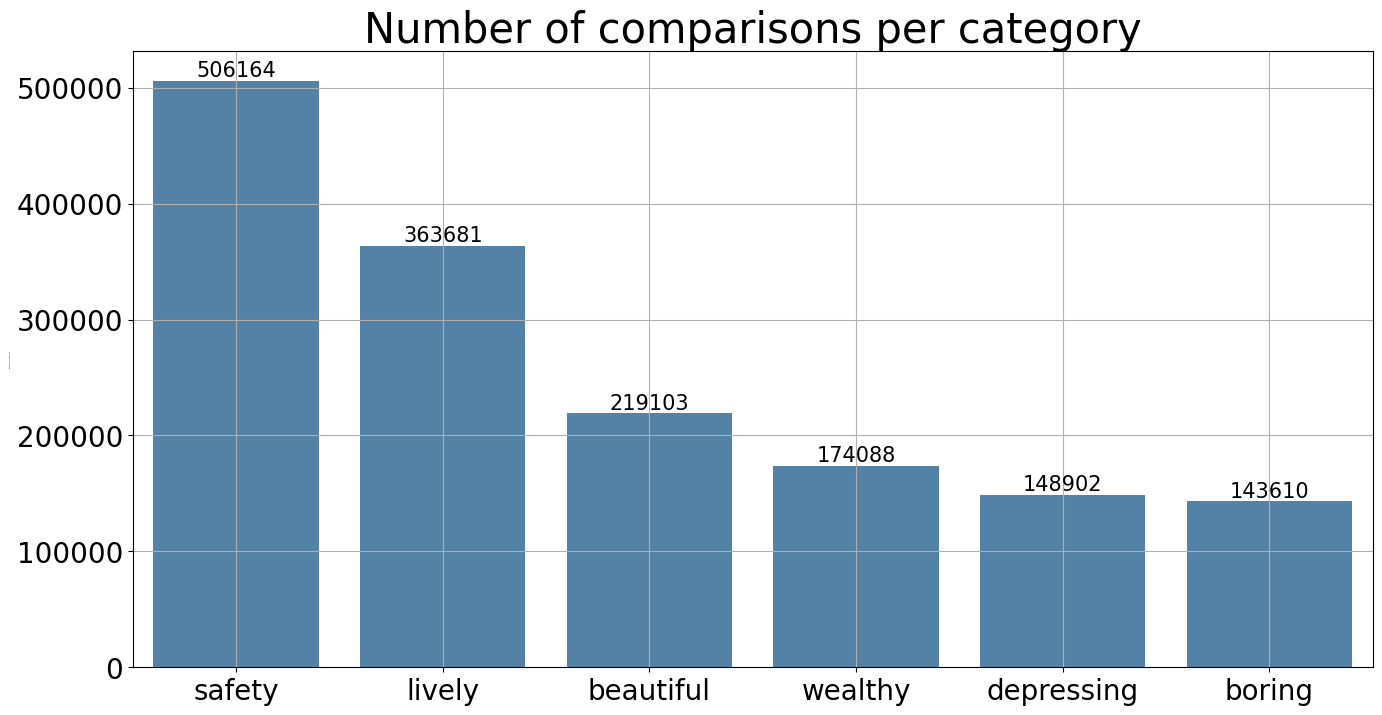

In [33]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

estado_df = pp.get_comparisons_count(comparisons_df).reset_index()

sns_fig = sns.barplot(
            data=estado_df,
            x=estado_df.columns[0],
            y=estado_df.columns[1],
            ax=ax,
            color="steelblue",
            order=estado_df.sort_values(estado_df.columns[1], ascending=False)[estado_df.columns[0]]
           )

sns_fig.set_title(f"Number of comparisons per category", fontsize=30)
sns_fig.set_ylabel(f"Number of comparisons", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_comparisons_per_category.png')
plt.show()

##### Number of  evaluated images and not evaluated

Total unique images: 108840


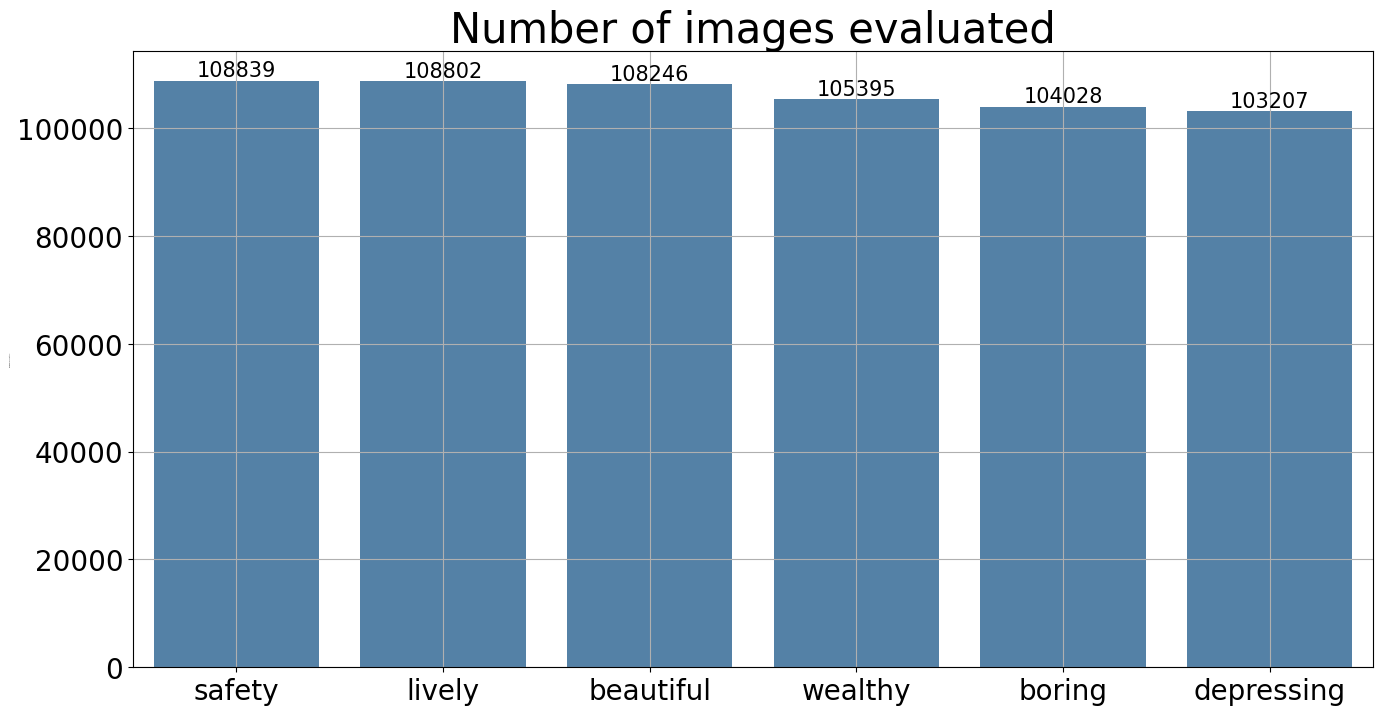

In [34]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

zero_counts = pp.get_evaluated_images_per_category(comparisons_df).reset_index()
print("Total unique images:", len(pp.get_evaluated_images(comparisons_df)))

sns_fig = sns.barplot(
            data=zero_counts,
            x=zero_counts.columns[0],
            y=zero_counts.columns[1],
            ax=ax,
            color="steelblue",
            order=zero_counts.sort_values(zero_counts.columns[1], ascending=False)[zero_counts.columns[0]]
           )

sns_fig.set_title(f"Number of images evaluated", fontsize=30)
sns_fig.set_ylabel(f"Number of locations", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_of_images_evaluated_per_category.png')
plt.show()

Total unique images: 108840


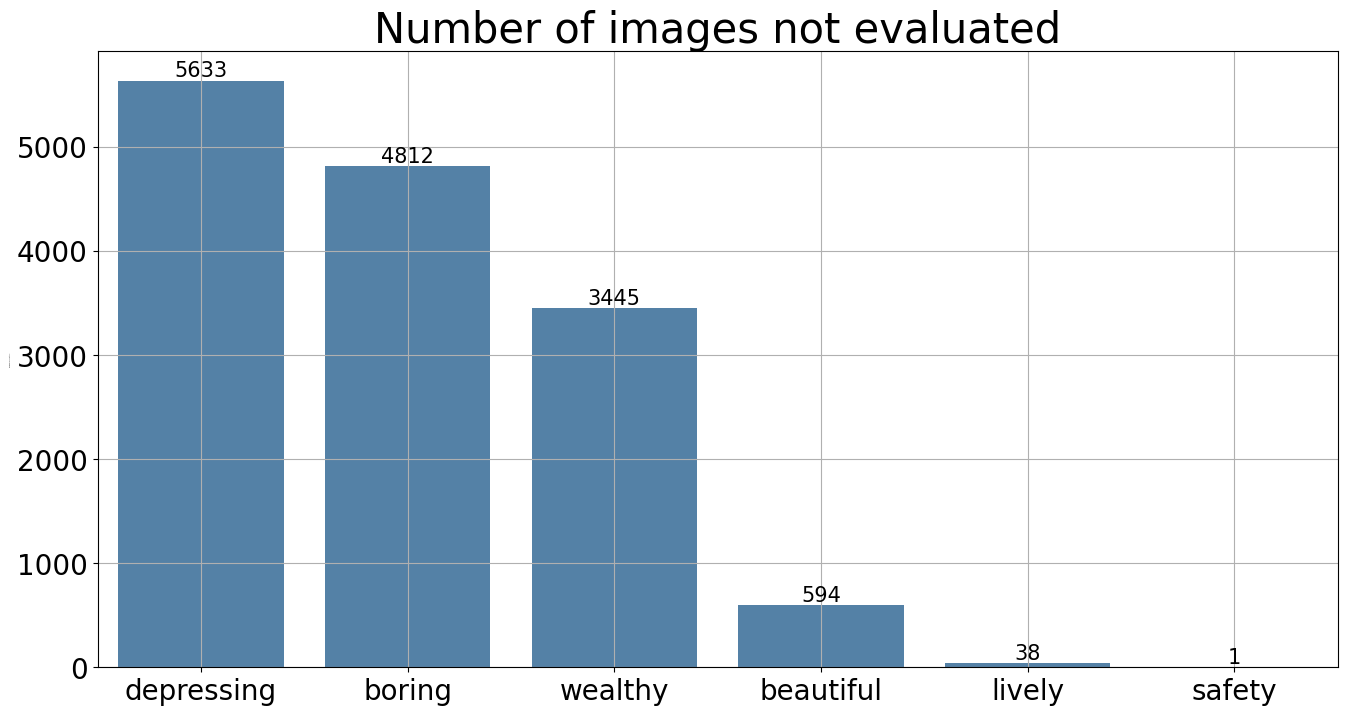

In [35]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

zero_counts = pp.get_evaluated_images_per_category(comparisons_df)
zero_counts = len(pp.get_evaluated_images(comparisons_df)) - zero_counts
zero_counts = zero_counts.reset_index()
print("Total unique images:", len(pp.get_evaluated_images(comparisons_df)))

sns_fig = sns.barplot(
            data=zero_counts,
            x=zero_counts.columns[0],
            y=zero_counts.columns[1],
            ax=ax,
            color="steelblue",
            order=zero_counts.sort_values(zero_counts.columns[1], ascending=False)[zero_counts.columns[0]]
           )

sns_fig.set_title(f"Number of images not evaluated", fontsize=30)
sns_fig.set_ylabel(f"Number of locations", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_of_images_not_evaluated_per_category.png')
plt.show()

##### Counting user votes

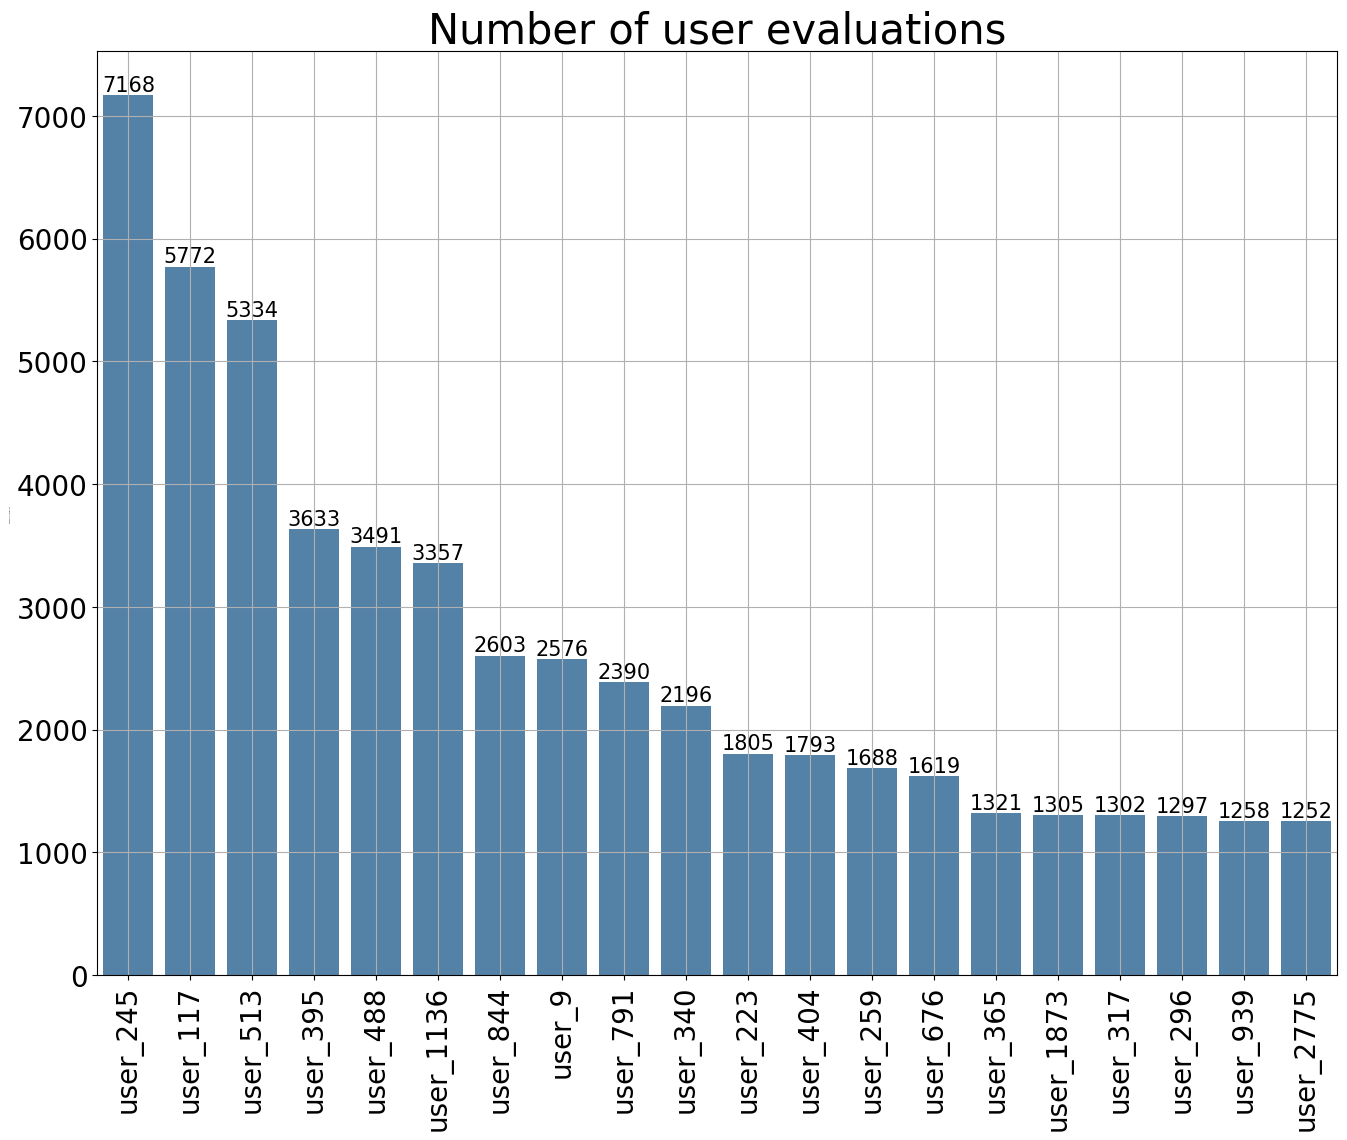

In [36]:
fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)

estado_df = pp.get_voter_count(comparisons_df).reset_index()[:20]

sns_fig = sns.barplot(
            data=estado_df,
            x=estado_df.columns[0],
            y=estado_df.columns[1],
            ax=ax,
            color="steelblue",
            order=estado_df.sort_values(estado_df.columns[1], ascending=False)[estado_df.columns[0]]
           )

sns_fig.set_title(f"Number of user evaluations", fontsize=30)
sns_fig.set_ylabel(f"Number of comparisons", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_evaluations_per_users.png')
plt.show()

##### Counting user votes per category

In [37]:
metrics = pp.get_metrics(comparisons_df)
metrics

<StringArray>
['safety', 'beautiful', 'wealthy', 'lively', 'boring', 'depressing']
Length: 6, dtype: str

In [38]:
for metric in metrics:
    verifyDir(f"{COMPARISONS_PATH}/{metric}/")
    city_comparisons_df = pd.pivot_table(comparisons_df[(comparisons_df["category"]==metric)],
                  index=["left_continent", "left_country", "left_city", "right_city", "right_country", "right_continent"],
                  values=["winner"],
                  aggfunc={
                      "winner":len
                  }).rename(columns={"winner":"num_comparisons"}).reset_index()
    city_comparisons_df.to_csv(f"{COMPARISONS_PATH}/{metric}/{metric}_comparisons.csv", sep=";", index=False)

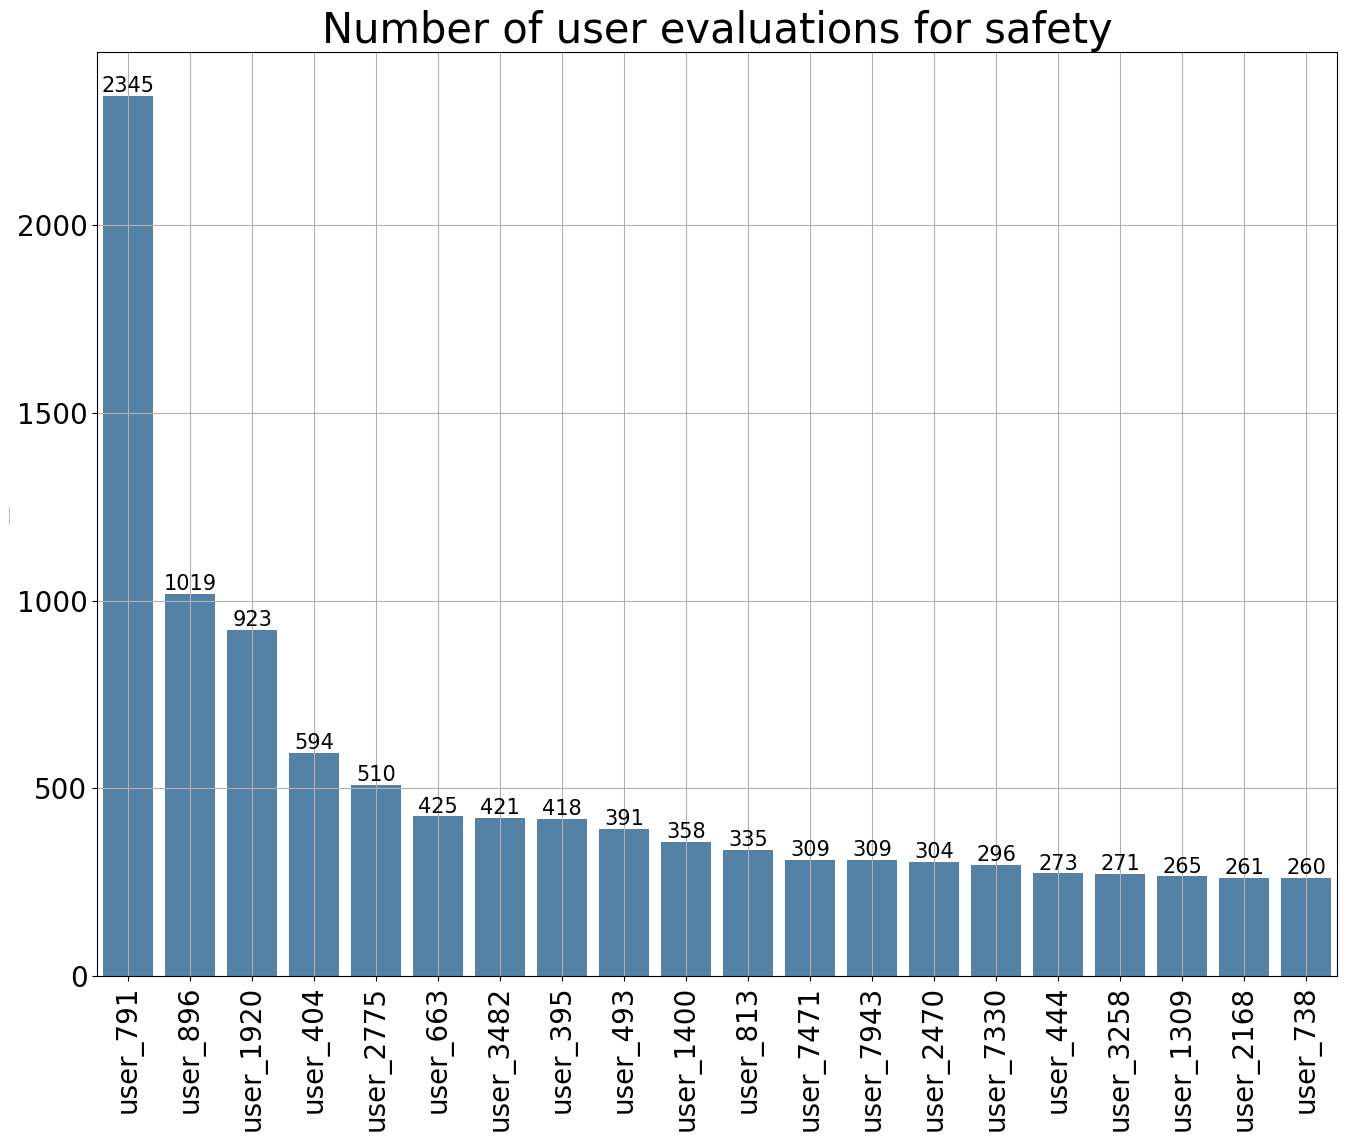

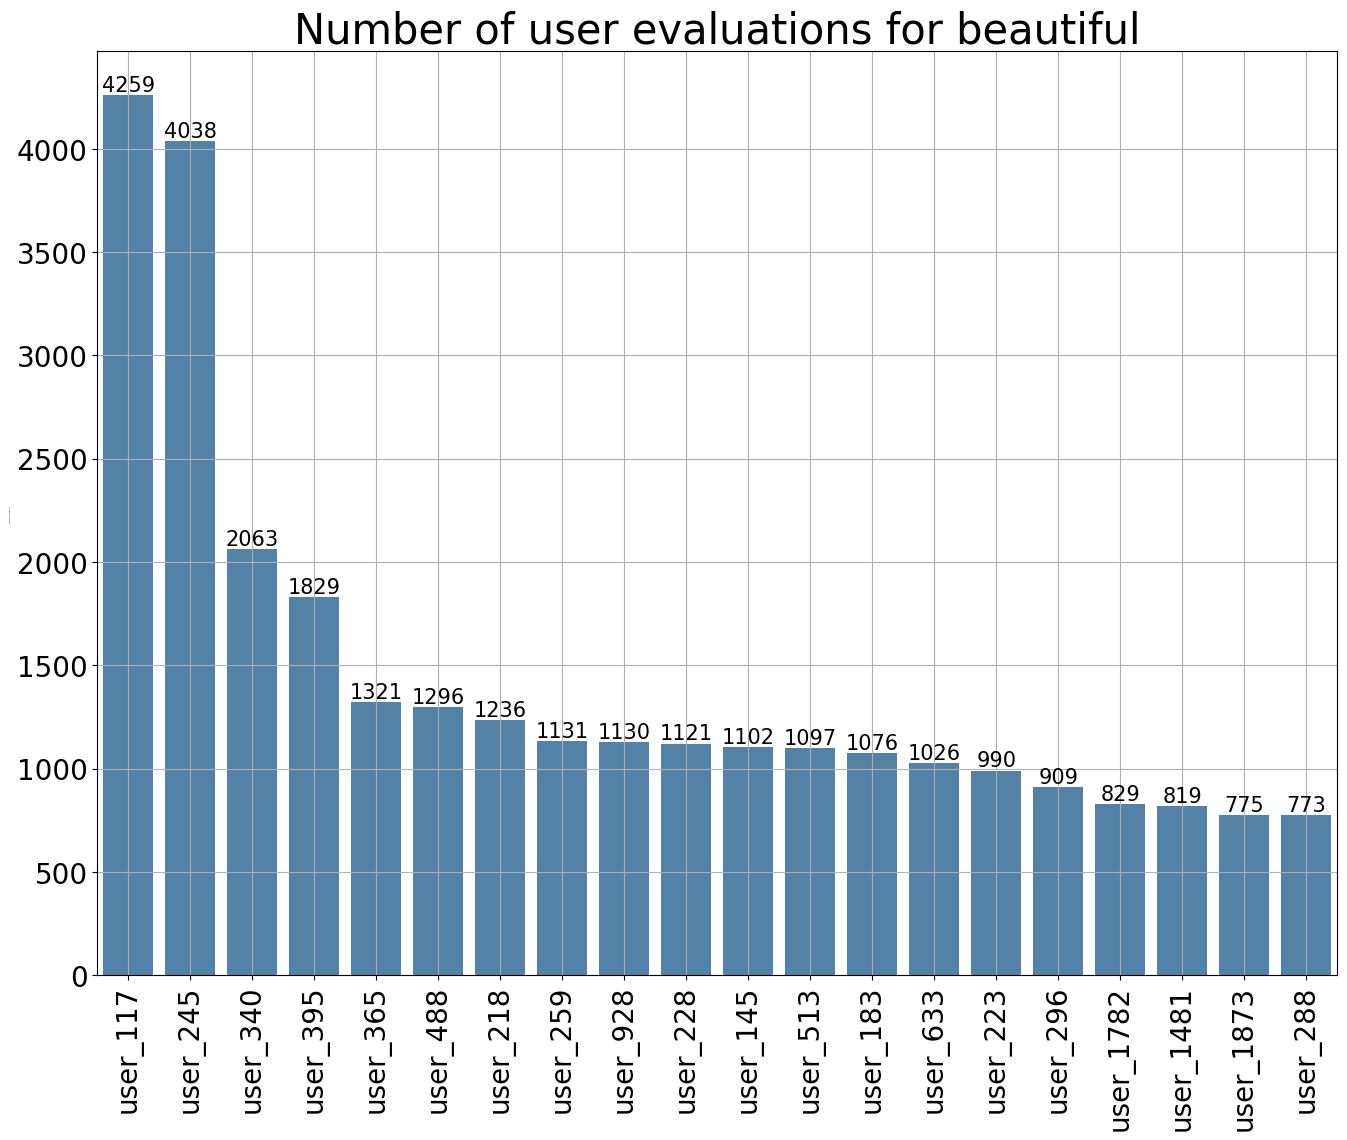

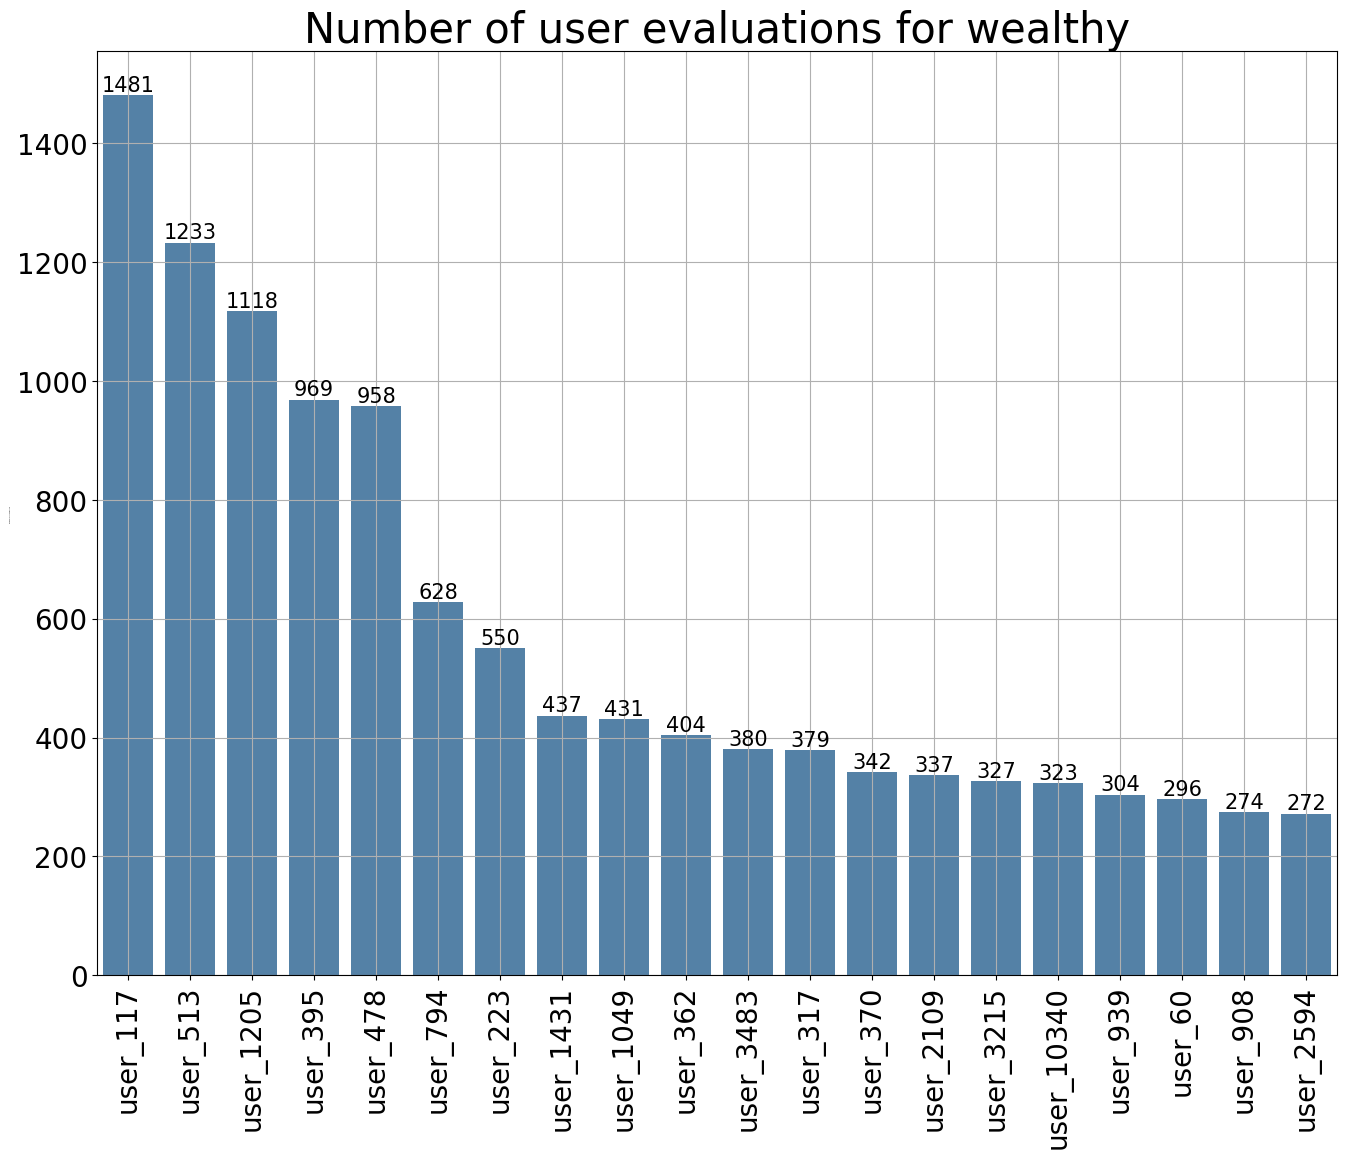

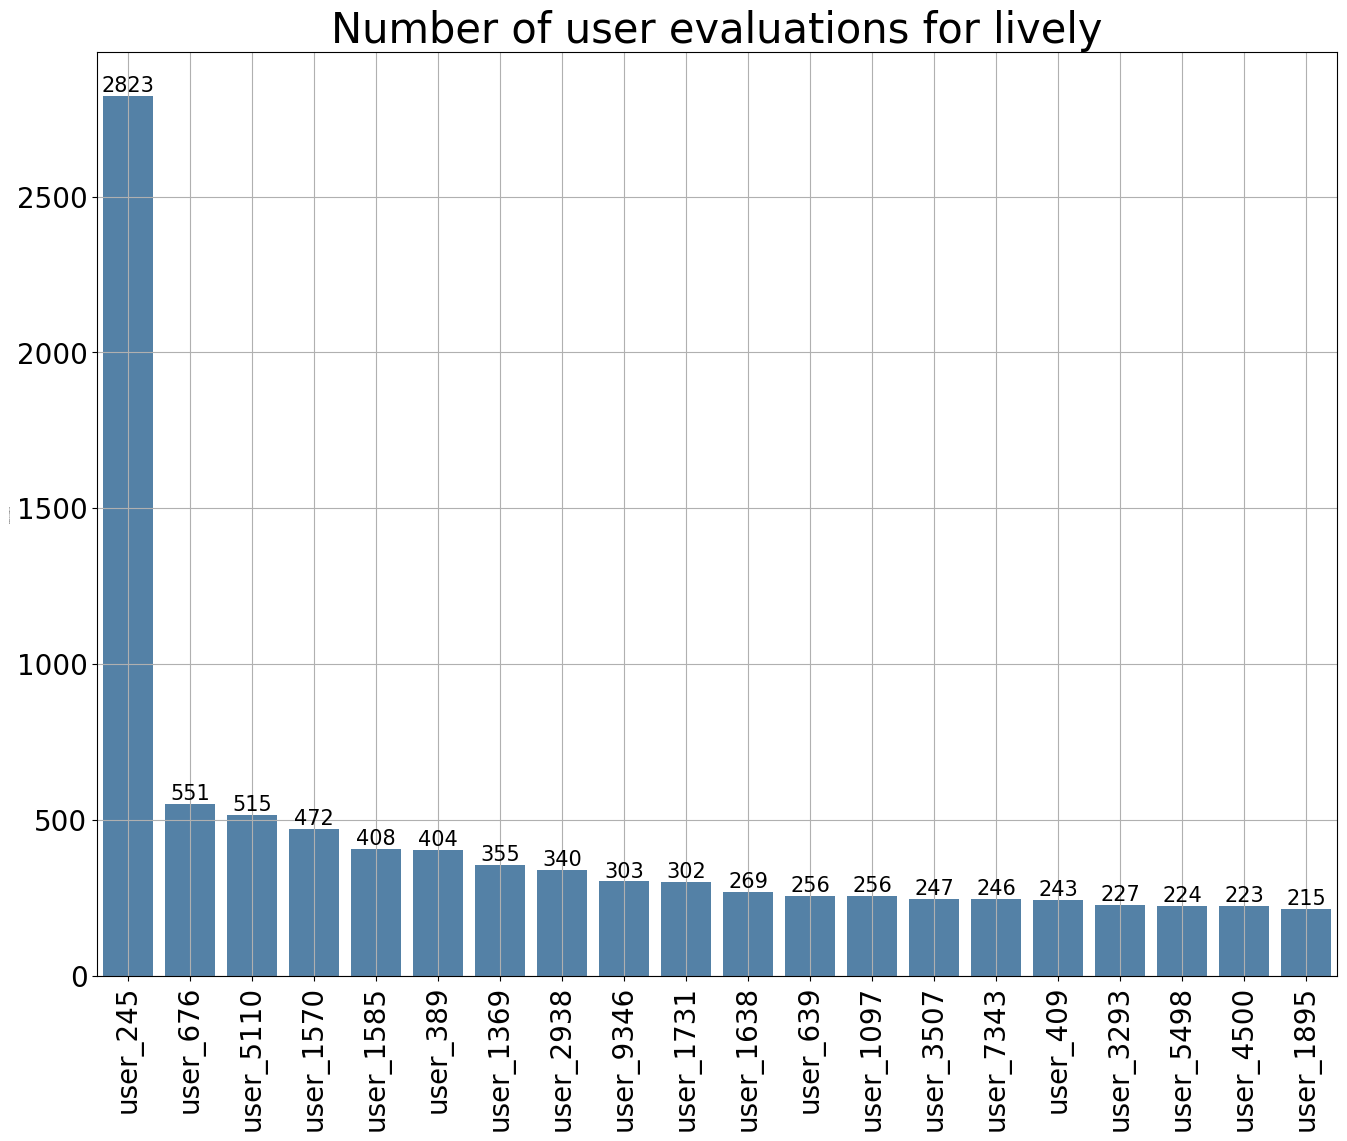

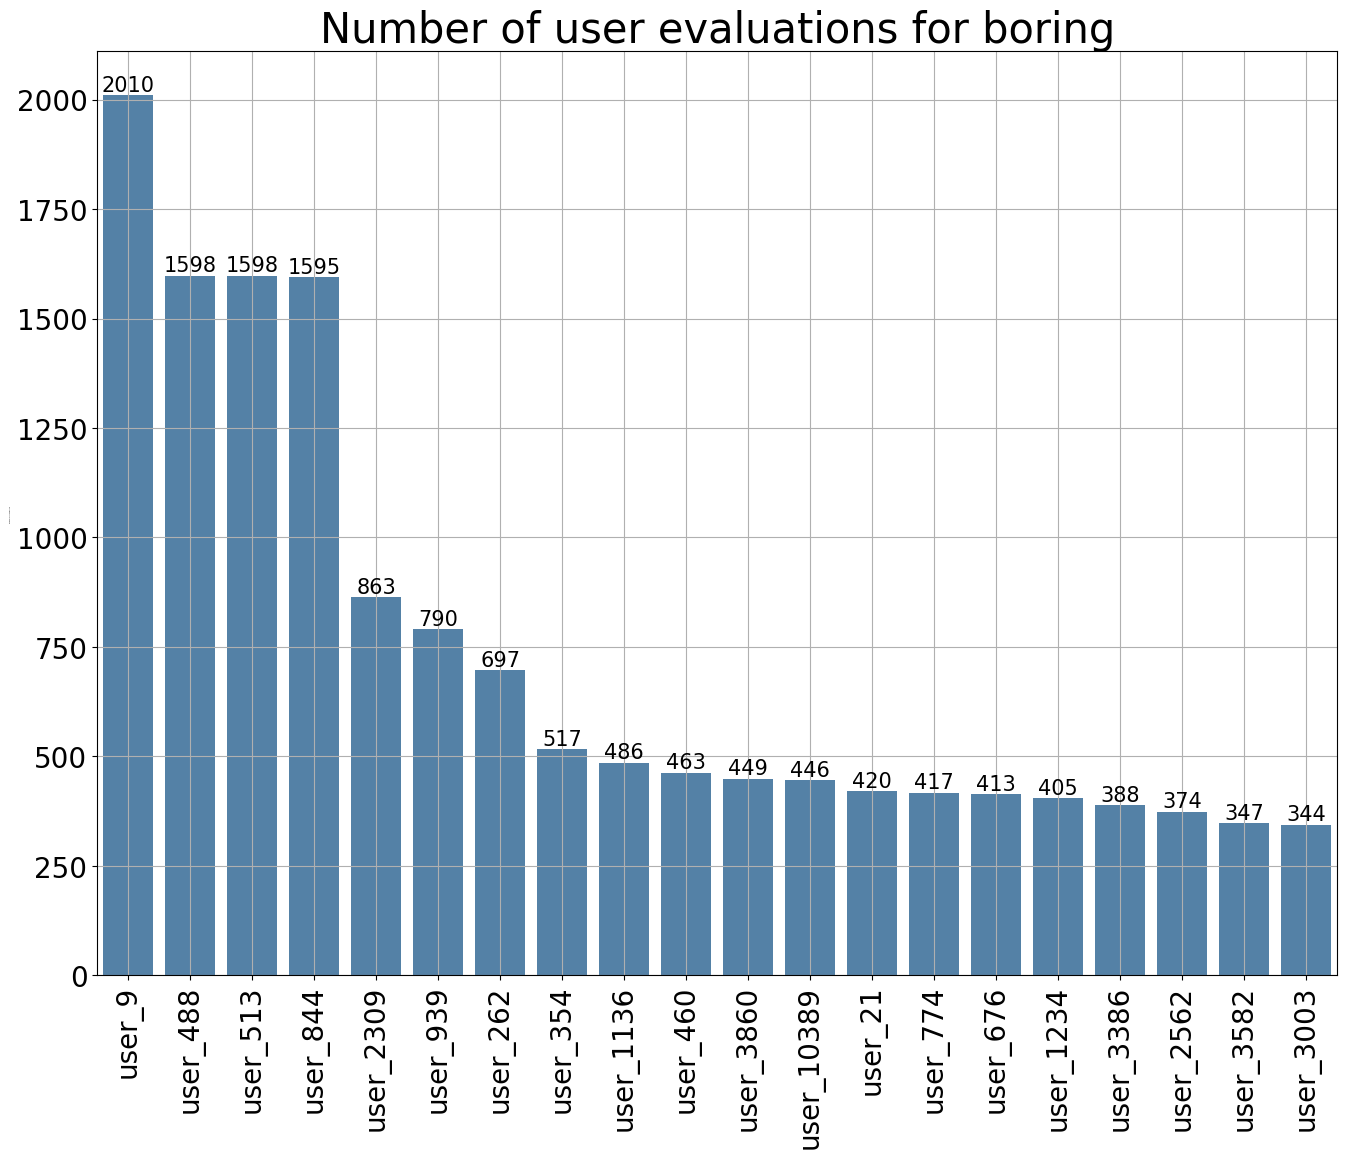

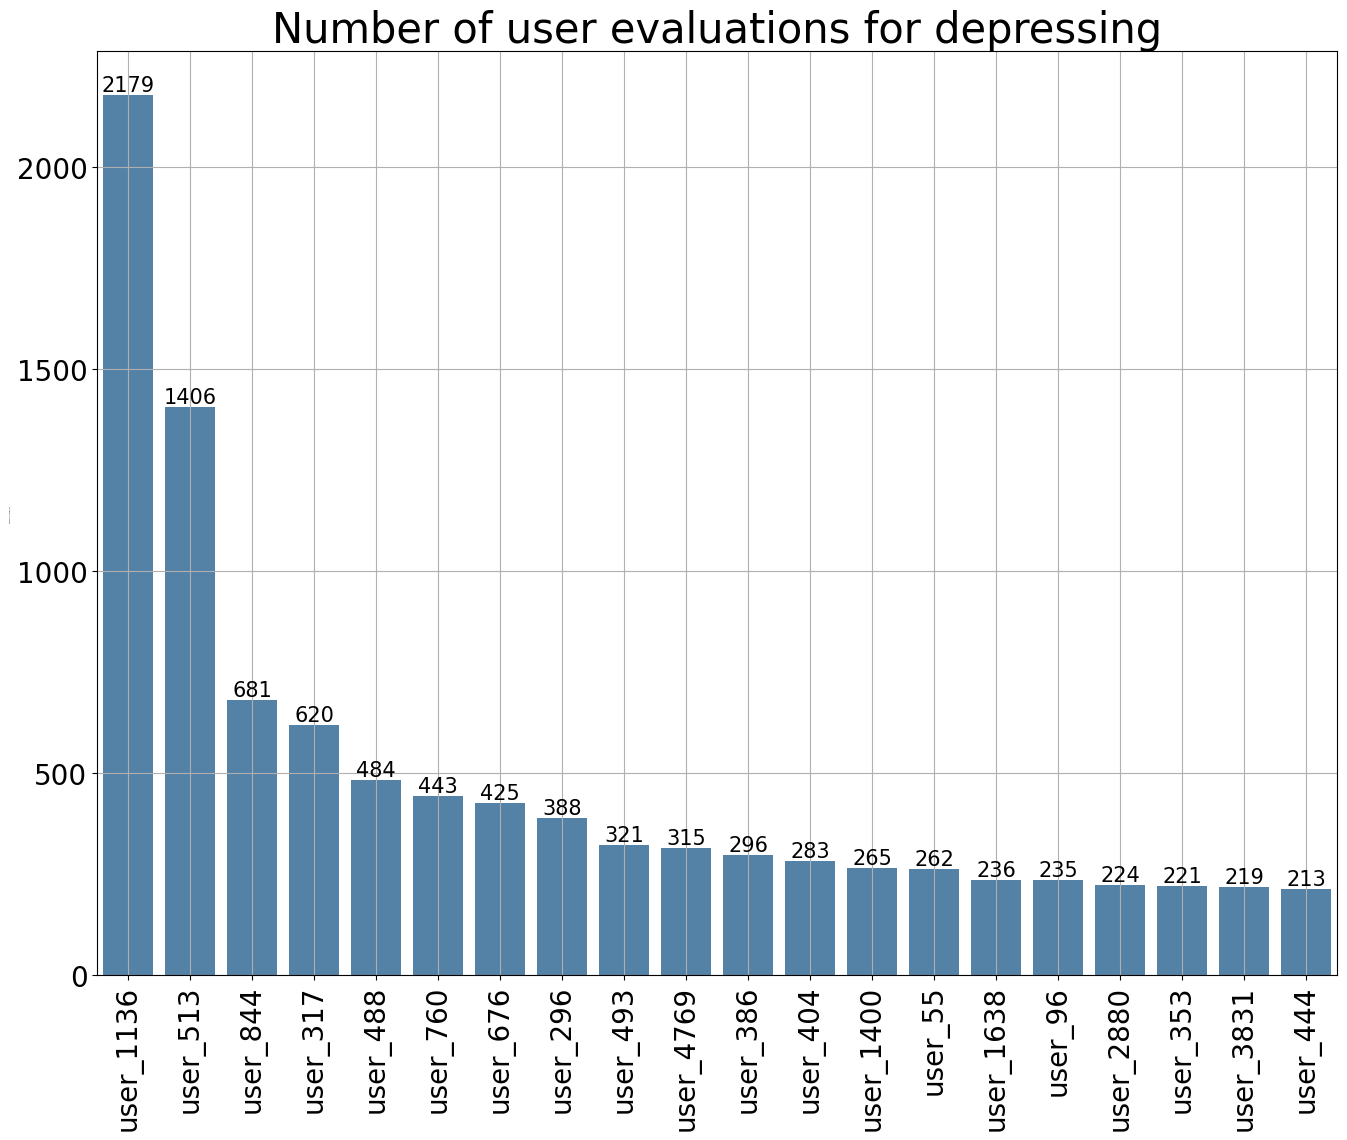

In [39]:
for metric in metrics:
    # verifyDir(f"{PROCESSED_IMAGES_PATH}{metric}/")
    estado_df = pp.get_voter_count(comparisons_df, metric=metric).reset_index()[:20]
    
    fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)

    sns_fig = sns.barplot(
                data=estado_df,
                x=estado_df.columns[0],
                y=estado_df.columns[1],
                ax=ax,
                color="steelblue",
                order=estado_df.sort_values(estado_df.columns[1], ascending=False)[estado_df.columns[0]]
               )

    sns_fig.set_title(f"Number of user evaluations for {metric}", fontsize=30)
    sns_fig.set_ylabel(f"Number of comparisons", fontsize=0)
    sns_fig.set_xlabel('', fontsize=20)

    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='x', rotation=90, labelsize=20)

    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='y', labelsize=20)

    # add annotation
    _ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

    # add a space on y for the annotations
    #sns_fig.margins(x=0.1)
    ax.grid(True)

    # fig.savefig(f'{PROCESSED_IMAGES_PATH}/{metric}/number_evaluations_per_users.png')
    plt.show()

### Saving final file

In [40]:
%%time
comparisons_df.to_csv(f"{COMPARISONS_PATH}comparisons.csv", sep=";", index=False)

CPU times: user 10.2 s, sys: 340 ms, total: 10.5 s
Wall time: 14.5 s


In [45]:
%%time
zip_path = f"{COMPARISONS_PATH}/comparisons.zip"
csv_path = f"{COMPARISONS_PATH}/comparisons.csv"

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_LZMA) as zipObj:
    zipObj.write(csv_path, arcname="comparisons.csv")
    zipObj.close()

CPU times: user 2min 22s, sys: 264 ms, total: 2min 22s
Wall time: 2min 22s
